# (Loan Data from Prosper)
## by (Maha Ahmed Abbas)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others..

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
mf=pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)

In [3]:
# high-level overview of data shape and composition
print(mf.shape)
print(mf.dtypes)


(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
mf.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# take a copy of origenal data to do our analysis
df=mf.copy()

#LoanStatus: 
>>The current status of the loan
 
#Term : 
>>the length of the loan expressed in months.

#BorrowerRate: 
>>the Borrower's interest rate for this loan. 

#ListingCategory (numeric( ):
>>The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation,  2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

#IncomeRange :
>>The income range of the borrower at the time the listing was created.

#LoanOriginalAmount :
>>The origination amount of the loan.

#IncomeVerifiable	: 
>>The borrower indicated they have the required documentation to support their income.

#DebtToIncomeRatio :
>>The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

#EmploymentStatus :
>>The employment status of the borrower at the time they posted the listing.

#StatedMonthlyIncome :
>>The monthly income the borrower stated at the time the listing was created.


In [6]:
# I have select 11 variable to exploration from the dataset
s=['LoanStatus','Term','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','IncomeRange','LoanOriginalAmount','IncomeVerifiable','EmploymentStatus','StatedMonthlyIncome']
df=pd.DataFrame(mf,columns=s)
df=df.round(2)
df.head()

,LoanStatus,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),IncomeRange,LoanOriginalAmount,IncomeVerifiable,EmploymentStatus,StatedMonthlyIncome
0,Completed,36,0.17,0.16,0,"$25,000-49,999",9425,True,Self-employed,3083.33
1,Current,36,0.12,0.09,2,"$50,000-74,999",10000,True,Employed,6125.00
2,Completed,36,0.28,0.28,0,Not displayed,3001,True,Not available,2083.33
3,Current,36,0.13,0.10,16,"$25,000-49,999",10000,True,Employed,2875.00
4,Current,36,0.25,0.21,2,"$100,000+",15000,True,Employed,9583.33


In [7]:
# ordered list of unique values in Term
terms = list(df.Term.unique())
terms.sort()

# convert data type of Term to (ordered) category
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df.Term = df.Term.astype(loan_terms)

# verify that data type of Term is (ordered) category
df.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

In [8]:
# descriptive statistics for numeric variables
df.describe()

,BorrowerAPR,BorrowerRate,ListingCategory (numeric),LoanOriginalAmount,StatedMonthlyIncome
count,113912.000000,113937.000000,113937.000000,113937.00000,1.139370e+05
mean,0.218991,0.192738,2.774209,8337.01385,5.608026e+03
std,0.080535,0.075021,3.996797,6245.80058,7.478497e+03
min,0.010000,0.000000,0.000000,1000.00000,0.000000e+00
25%,0.160000,0.130000,1.000000,4000.00000,3.200330e+03
50%,0.210000,0.180000,1.000000,6500.00000,4.666670e+03
75%,0.280000,0.250000,3.000000,12000.00000,6.825000e+03
max,0.510000,0.500000,20.000000,35000.00000,1.750003e+06


In [9]:
#  the unique value of  ListingCategory (numeric) column
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [10]:
# replace the feature of [ListingCategory (numeric)] to its describtion 
df['ListingCategory (numeric)'].replace(to_replace=[0,1,2,3,4,5,6,7,8, 9, 10,11,12,13,14,15,16,17,18,19,20],value=['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle,','RV','Taxes','Vacation','Wedding Loans'],inplace=True)
df.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)
df

,LoanStatus,Term,BorrowerAPR,BorrowerRate,ListingCategory,IncomeRange,LoanOriginalAmount,IncomeVerifiable,EmploymentStatus,StatedMonthlyIncome
0,Completed,36,0.17,0.16,Not Available,"$25,000-49,999",9425,True,Self-employed,3083.33
1,Current,36,0.12,0.09,Home Improvement,"$50,000-74,999",10000,True,Employed,6125.00
2,Completed,36,0.28,0.28,Not Available,Not displayed,3001,True,Not available,2083.33
3,Current,36,0.13,0.10,"Motorcycle,","$25,000-49,999",10000,True,Employed,2875.00
4,Current,36,0.25,0.21,Home Improvement,"$100,000+",15000,True,Employed,9583.33
...,...,...,...,...,...,...,...,...,...,...
113932,Current,36,0.22,0.19,Debt Consolidation,"$50,000-74,999",10000,True,Employed,4333.33
113933,FinalPaymentInProgress,36,0.13,0.11,Other,"$75,000-99,999",2000,True,Employed,8041.67
113934,Current,60,0.24,0.22,Debt Consolidation,"$25,000-49,999",10000,True,Employed,2875.00
113935,Completed,60,0.28,0.26,Home Improvement,"$25,000-49,999",15000,True,Full-time,3875.00


In [11]:
# the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   LoanStatus           113937 non-null  object  
 1   Term                 113937 non-null  category
 2   BorrowerAPR          113912 non-null  float64 
 3   BorrowerRate         113937 non-null  float64 
 4   ListingCategory      113937 non-null  object  
 5   IncomeRange          113937 non-null  object  
 6   LoanOriginalAmount   113937 non-null  int64   
 7   IncomeVerifiable     113937 non-null  bool    
 8   EmploymentStatus     111682 non-null  object  
 9   StatedMonthlyIncome  113937 non-null  float64 
dtypes: bool(1), category(1), float64(3), int64(1), object(4)
memory usage: 7.2+ MB


In [12]:
# find if the dataset has missing value or not
df.isnull().sum()

LoanStatus                0
Term                      0
BorrowerAPR              25
BorrowerRate              0
ListingCategory           0
IncomeRange               0
LoanOriginalAmount        0
IncomeVerifiable          0
EmploymentStatus       2255
StatedMonthlyIncome       0
dtype: int64

In [13]:
# Drop all missing value 
df.drop(df.index[df.isnull().any(axis=1)],0,inplace=True)


In [14]:
#overview of data shape after drop the missing data
df.shape

(111682, 10)

In [15]:
# check if all missing values have deleted 
df.isnull().sum()

LoanStatus             0
Term                   0
BorrowerAPR            0
BorrowerRate           0
ListingCategory        0
IncomeRange            0
LoanOriginalAmount     0
IncomeVerifiable       0
EmploymentStatus       0
StatedMonthlyIncome    0
dtype: int64

### What is the structure of your dataset?

> This data set contains 103157 loans with 11 variables on each loan, including  Loan Statu , Term	 , Borrower APR	, Borrower Rate	 , Listing Category	 , Income Range ,Loan Original Amount , IncomeVerifiabl , Debt To Income Ratio and other features 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out  the  relationships between the Loan Status and (Term	 , Borrower APR	, Borrower Rate	 , Listing Category	 , Income Range ,Loan Original Amount , IncomeVerifiabl , Debt To Income Ratio	, Employment Status	, and  Stated Monthly Income)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Listing Category will have the strongest effect on Loan Status : the larger the loan, the higher the porpose of having the loan . I also think that the Income Range , Employment Status,  and the other variables will have effects on the Loan Status

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

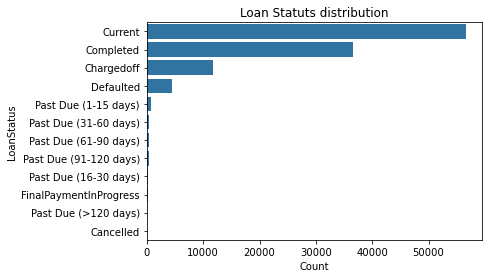

In [62]:
## Plot the LoanStatus on a Horizontal bar chart
base_color = sb.color_palette()[0]
LoanStatus_order = df['LoanStatus'].value_counts().index
sb.countplot(data=df, y='LoanStatus', color=base_color, order=LoanStatus_order)
plt.xlabel('Count')
plt.title('Loan Statuts distribution');

>According to the loan status plot it seem that  about 56000 loens still not completed, and about 35000 loans had completed
>Next up, the first predictor variable of interest: ListingCategory.

In [17]:
# Count the frequency of unique values in the `ListingCategory` column of df  dataframe. 
# By default, returns the decreasing order of the frequency.
Listing_Category_counts = df['ListingCategory'].value_counts()
Listing_Category_counts

Debt Consolidation    58308
Not Available         14710
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle,             304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [18]:
# Get the unique values of the `ListingCategory` column, in the decreasing order of the frequency.
ListingCategory_order=Listing_Category_counts.index
ListingCategory_order

Index(['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',
       'Business', 'Auto', 'Personal Loan', 'Household Expenses',
       'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
       'Vacation', 'Student Use', 'Motorcycle,', 'Engagement Ring',
       'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV'],
      dtype='object')

In [19]:
# Returns the sum of all not-null values in `ListingCategory ` column
df_ListingCategory = df['ListingCategory'].value_counts().sum()

# Return the highest frequency in the `ListingCategory ` column
max_Listing_Category_counts = Listing_Category_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_Listing_Category_counts / df_ListingCategory
print(max_prop)

0.5220895041277914


In [20]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
Listing_Category_props = np.arange(0, max_prop, 0.02)
Listing_Category_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52])

In [21]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
Listing_Category_names = ['{:0.2f}'.format(v) for v in Listing_Category_props]
Listing_Category_names

['0.00',
 '0.02',
 '0.04',
 '0.06',
 '0.08',
 '0.10',
 '0.12',
 '0.14',
 '0.16',
 '0.18',
 '0.20',
 '0.22',
 '0.24',
 '0.26',
 '0.28',
 '0.30',
 '0.32',
 '0.34',
 '0.36',
 '0.38',
 '0.40',
 '0.42',
 '0.44',
 '0.46',
 '0.48',
 '0.50',
 '0.52']

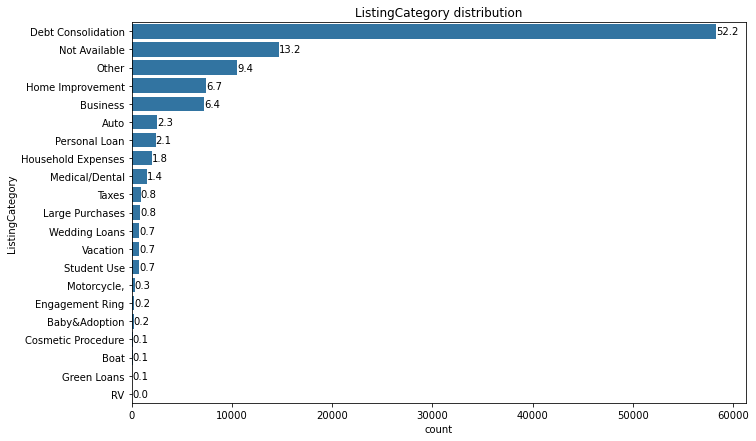

In [74]:
# Plot the ListingCategory on a Horizontal bar chart
plt.figure(figsize = (11, 7))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='ListingCategory', color=base_color, order=ListingCategory_order);
# Logic to print the proportion text on the bars
for i in range (Listing_Category_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = Listing_Category_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/df_ListingCategory)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')
    plt.title('ListingCategory distribution');

> %53 of People who took the loan is for dept consolidation  and 14% not say the resone of taking the loan
>I'll now move on to the other categorical  variables in the dataset: EmploymentStatus, IncomeRange ,IncomeVerifiable 

In [23]:
# Returns the values in `EmploymentStatus ` column
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

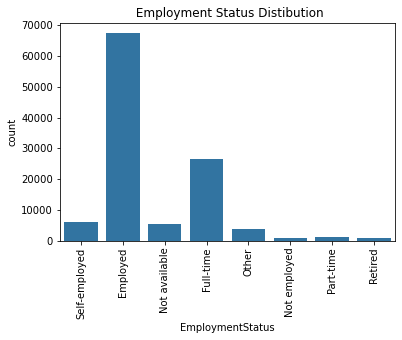

In [24]:
# Plot the EmploymentStatus  on a Vertical bar chart
sb.countplot(data=df, x='EmploymentStatus', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)
plt.title(' Employment Status Distibution');

>In the case of Employ ment statuse there are 65896 of borrower  who took loan are employed but i noticed that there are  96 borrower  had the loan while they were notemployed so it's not ilegal to give loan to poaple who don't have job to pay off the loan 
> > Now i will  move on to the other categorical  variables in the dataset:  IncomeRange 

In [25]:
# Returns the values in `IncomeRange ` column
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
Not displayed      5486
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [26]:
df['IncomeVerifiable'].value_counts()

True     103052
False      8630
Name: IncomeVerifiable, dtype: int64

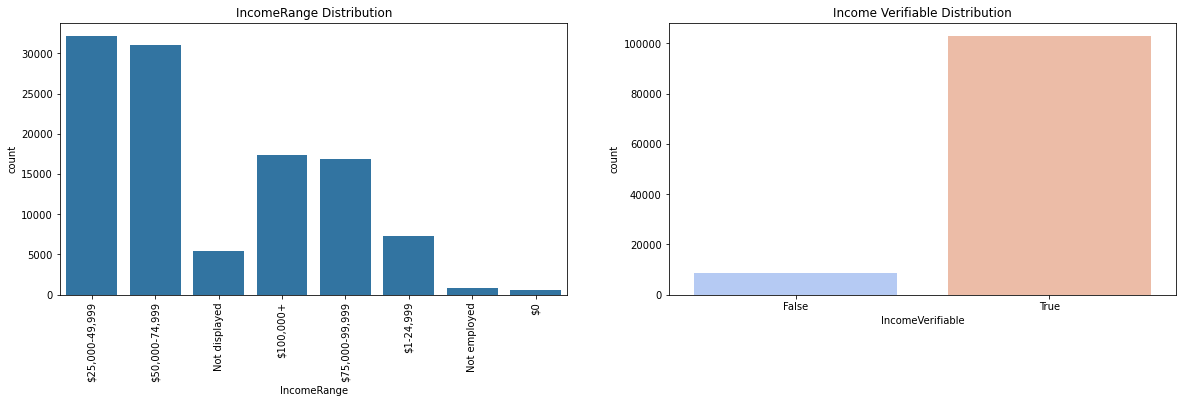

In [68]:
# let's plot IncomeRange and IncomeVerifiable  together to get an idea of each ordinal variable's distribution.
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df,x='IncomeRange',color=base_color);
plt.xlabel('IncomeRange');
plt.ylabel('count');
plt.title('IncomeRange Distribution')
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
sb.countplot(data=df,x='IncomeVerifiable',palette='coolwarm');
plt.xlabel('IncomeVerifiable');
plt.ylabel('count');
plt.title('Income Verifiable Distribution');

>> According to the previous plot taking incomerange first  i found that there are 29881 of borrower who took loan there 
>>IncomeRange  between  (25,000- 49,999  ) ,  29360 had an incomerange between (50000-74999) and 78 had not income there were notemployed 
>> In IncomeVerifiable there are 102910 of The borrower have the required documentation to support their income.
and 247 of borrower haven't the required documentation to support their income



>> Now i will move to plot some numeric variable (BorrowerAPR	BorrowerRate, term)

>BorrowerAPR and BorrowerRate
>>The BorrowerRate (interest rate) refers to the annual cost of a loan to  a borrower and is expressed as a percentage. The interest rate does not  include fees charged for the loan. The BorrowerAPR is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage  insurance, most closing costs, discount points and loan origination  fees) to reflect the total cost of the loan.

In [29]:
df['BorrowerAPR'].value_counts()

0.36    6198
0.20    5878
0.18    5657
0.16    5326
0.21    5138
0.13    4925
0.17    4843
0.14    4664
0.15    4556
0.22    4489
0.19    4419
0.25    4309
0.23    4274
0.27    4004
0.29    3835
0.30    3825
0.31    3648
0.24    3611
0.12    3380
0.09    2857
0.35    2845
0.26    2418
0.28    2217
0.10    2003
0.11    1904
0.32    1860
0.33    1854
0.37    1651
0.08    1638
0.34    1347
0.07    1062
0.38     360
0.39     340
0.06     193
0.41      70
0.40      36
0.05      18
0.02      13
0.01       6
0.04       5
0.03       5
0.42       1
Name: BorrowerAPR, dtype: int64

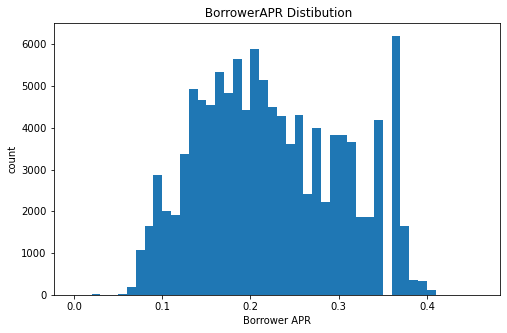

In [31]:
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('count')
plt.title(' BorrowerAPR Distibution');

C:\Users\20111\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


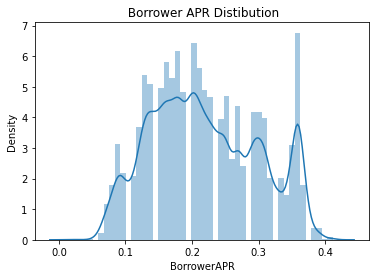

In [32]:
# Set the argument  to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(df['BorrowerAPR'])
plt.title(' Borrower APR Distibution');

> By this plot i found that The  most   Borrower's Annual Percentage Rate (APR) for the loan  uses  is 35%

In [33]:
df['BorrowerRate'].value_counts()

0.14    6387
0.18    6234
0.32    5922
0.16    5860
0.15    5481
0.20    5480
0.12    5208
0.10    4980
0.17    4591
0.19    4549
0.13    4438
0.26    4249
0.11    3882
0.25    3824
0.22    3734
0.21    3717
0.08    3615
0.29    3528
0.23    3275
0.09    3242
0.27    3226
0.24    2951
0.31    2716
0.28    2457
0.35    2040
0.30    1882
0.07    1821
0.06    1032
0.33     626
0.34     543
0.05     125
0.04      19
0.36      16
0.01      12
0.00      11
0.03       8
0.02       1
Name: BorrowerRate, dtype: int64

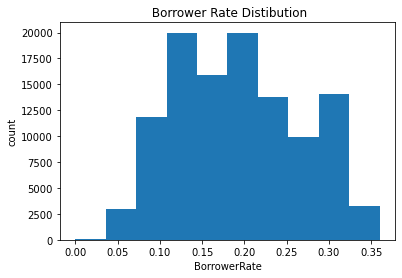

In [34]:
# Create bins with step-size 10
plt.hist(data = df, x = 'BorrowerRate', bins = 10)
plt.xlabel('BorrowerRate')
plt.ylabel('count')
plt.title(' Borrower Rate Distibution');

>> The most  Borrower's interest rate for this loan is 31%  it used for 2990 time. 
>>  the distribution of BorrowerAPR and BorrowerRate are  similar with  slight difference since the APR is always higher than the interest rate.
>Now i will move on to the other numeric variables in the dataset: Terms

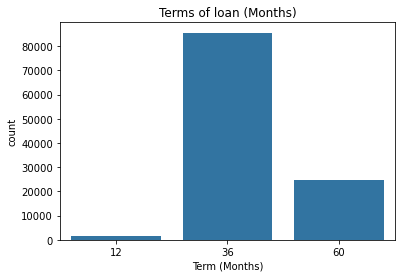

In [35]:
# profile of terms for Prosper loans
# bar plot of number of loans for each term
base_color = sb.color_palette()[0]
sb.countplot(data=df,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

>>According to the bar plot above, 76.58% of loans for borrowers using Prosper were offered for a length of 36 months. Loans with a length of 60 months were less than a third of this proportion. Year-long loans were only 1.45% of all the loans offered in Prosper.
> Now i will on visualize the other numeric valiable (LoanOriginalAmount ,StatedMonthlyIncome)

In [36]:
df['LoanOriginalAmount'].value_counts()

4000     14239
15000    12378
10000    11030
5000      6800
2000      5935
         ...  
8556         1
4522         1
6571         1
4586         1
4098         1
Name: LoanOriginalAmount, Length: 2435, dtype: int64

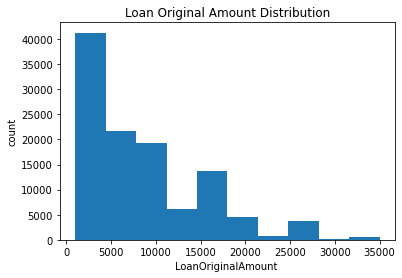

In [37]:
# Create bins with step-size 10
plt.hist(data = df, x = 'LoanOriginalAmount', bins = 10)
plt.xlabel('LoanOriginalAmount ')
plt.ylabel('count')
plt.title('Loan Original Amount Distribution');

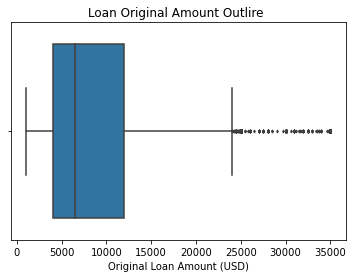

In [71]:
# second of two subplots arranged in 1-by-2
sb.boxplot(data = df, x = 'LoanOriginalAmount', fliersize = 2) # box plot of loan amounts
plt.xlabel('Original Loan Amount (USD)')
plt.title('Loan Original Amount Outlire ');

>The box plot of the original amount of loans suggested that the distribution is right-skewed with the center observed at approximately 7,000
>However, the histogram did not show a gradual decrease in the observed frequency with increasing amount of loans. For instance, the observed frequencies for the fifth and the eighth bins were larger than two times the frequencies of the fourth and seventh bins.

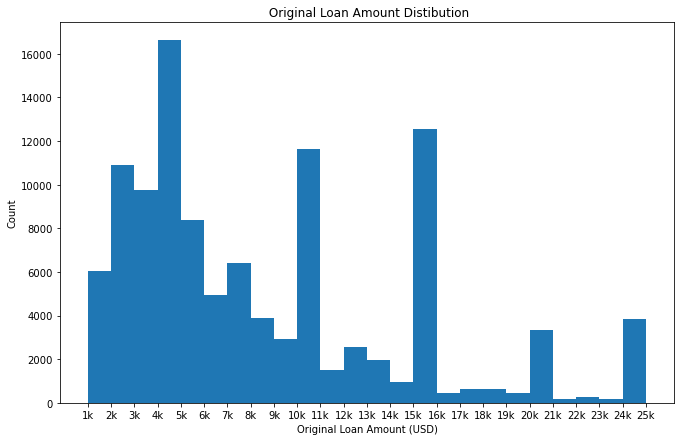

In [39]:
# loan amounts for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (11, 7))

bins = np.arange(df.LoanOriginalAmount.min(), 25000+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = ['{:.0f}k'.format(bin_edge/1000) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Count')
plt.title(' Original Loan Amount Distibution');

>The irregularity in the distribution of the original amount of loans was accentuated by the histogram above which plotted the distribution of the original loan amount ranging from \1,000 to \\25,000. Although the overall distribution appeared to be right-skewed, peaks were observed in non-adjacent bins such as 14,000 listings for loans between \4,000 and \\5,000, 11,000 listings for loans between \15,000 and \\16,000 and 10,000 listings for loans between \10,000 and \\11,000.
> plot the StatedMonthlyIncome


In [40]:
df['StatedMonthlyIncome'].value_counts()

4166.67    3444
5000.00    3329
3333.33    2843
3750.00    2371
5416.67    2330
           ... 
3938.17       1
3421.83       1
414.50        1
2652.17       1
7579.08       1
Name: StatedMonthlyIncome, Length: 13334, dtype: int64

In [41]:
df['StatedMonthlyIncome'].max() , df['StatedMonthlyIncome'].min()

(1750002.92, 0.0)

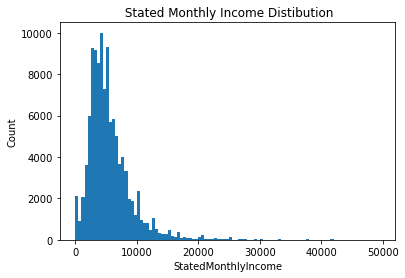

In [42]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins_smi)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.title(' Stated Monthly Income Distibution');


>The distribution of the borrowers' stated monthly incomes was right-skewed. Bulk of the listings were for borrowers with monthly incomes between \$2,000 and \\$6,000. The center of the distribution hints a possiblity of a vicious cycle in which individuals with relatively low incomes seek for loans which in turn may put them in a worse financial position.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The  LoanOriginalAmount and StatedMonthlyIncome have a right skewed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have reduse the number of decemle of (BorrowerAPR, BorrowerRate	and StatedMonthlyIncome) to have  a good insight  !

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# 2 -qualitative vs qualitative variable

In [43]:
df.stack()

0       LoanStatus                  Completed
        Term                               36
        BorrowerAPR                      0.17
        BorrowerRate                     0.16
        ListingCategory         Not Available
                                    ...      
113936  IncomeRange            $50,000-74,999
        LoanOriginalAmount               2000
        IncomeVerifiable                 True
        EmploymentStatus             Employed
        StatedMonthlyIncome           4583.33
Length: 1116820, dtype: object

### quantitative vs qualitative variable


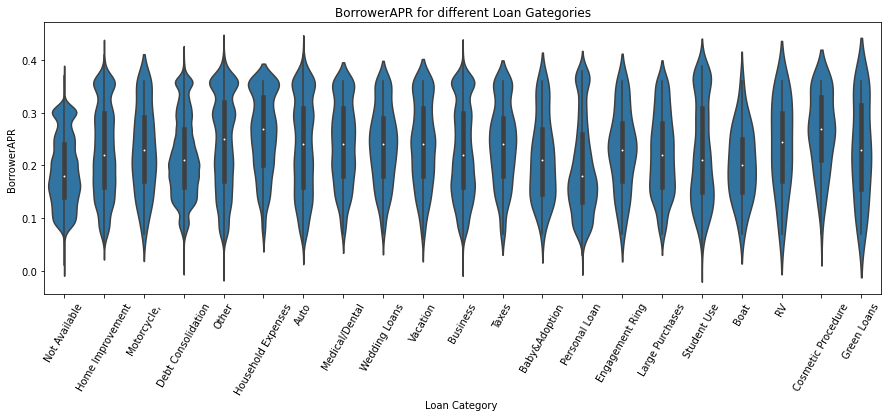

In [44]:
#plot ListingCategory vs BorrowerAPR
plt.figure(figsize = [15, 5])
sb.violinplot(data=df,x='ListingCategory', y='BorrowerAPR',color=base_color);
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');
plt.title('BorrowerAPR for different Loan Gategories')
plt.xticks(rotation=60);


>It is noticed that mostly Cosmetic Procedure are given higer interest rates, and the personal loan are given the lower interest rates

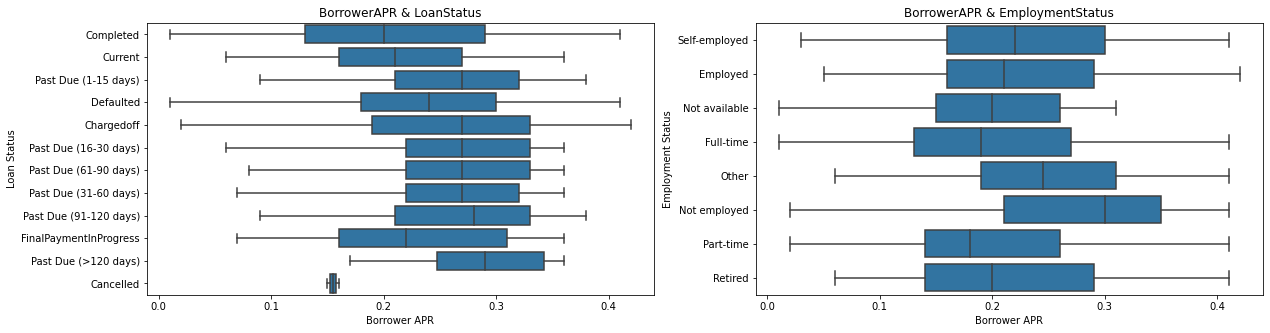

In [45]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sb.boxplot(data=df,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');

>On the left: Current and completed loans have lower rate than the past-due loans and chargedoff.and no relationShip between LoanStaues and Borrowers APR

>On the right: Employed ,full time and  Self- employed  people have lower rates than not employed , there are nigative relationship between BorrwerAPR and EmploymentStatus

### qualitative  vs qualitative variable

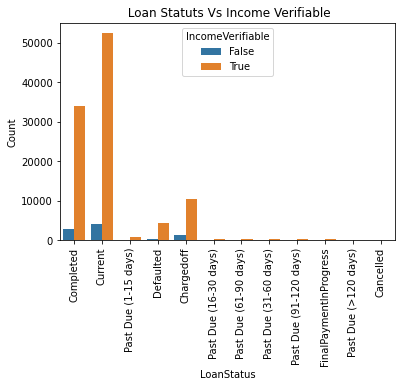

In [46]:
#plot the relationship between LoanStatus and IncomeVerifiable
sb.countplot(data = df, x = 'LoanStatus', hue = 'IncomeVerifiable')
plt.xticks(rotation = 90)
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.title(' Loan Statuts Vs Income Verifiable');

> according to the plot , borrowers who have copleted and still paying the loan have  the required documentation to support their income rather then the borrowers that they haven't  the required documentation to support their income. so there are a postitive relationship between LoanStatus and IncomeVerifiable

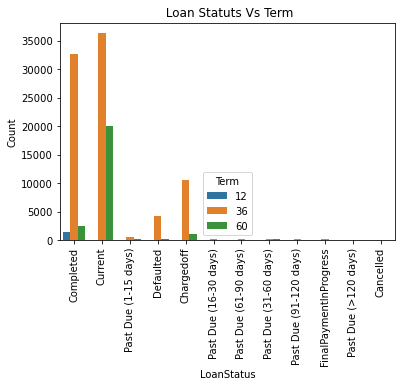

In [47]:
#plot the relationship between LoanStatus and term
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term')
plt.xticks(rotation = 90)
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.title(' Loan Statuts Vs Term');

 >>There was no relationship between LoanStatus and term

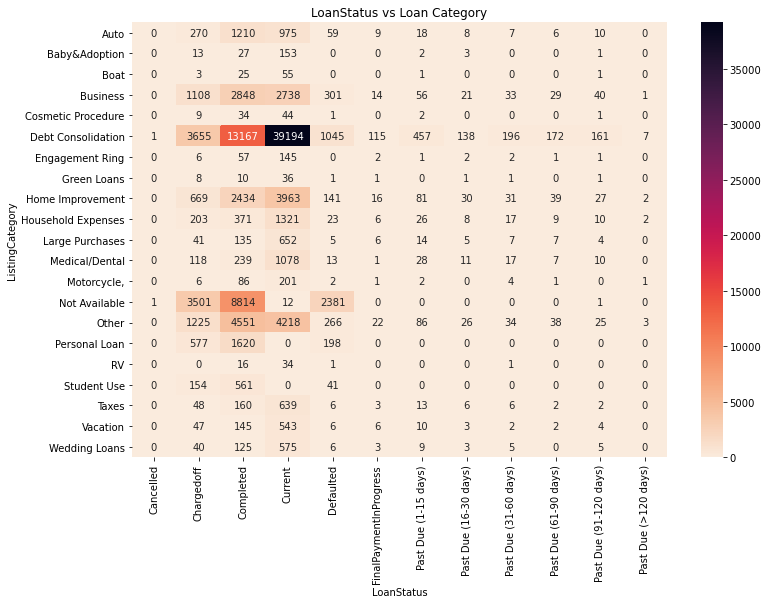

In [48]:
# plot using heatmap to determine  the relationship between  LoanStatus and  ListingCategory according to IncomeRange
cat_counts = df.groupby(['ListingCategory', 'LoanStatus']).count()['IncomeRange']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'IncomeRange': 'count'}) 
cat_counts = cat_counts.pivot(index = 'ListingCategory', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [12, 8])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('LoanStatus vs Loan Category');

> > according to the heatmap , i found that the the  13167 of Borrowers who took the loan for the  Dept consolidation has been completed the loan and  39194 still payingg for the loan


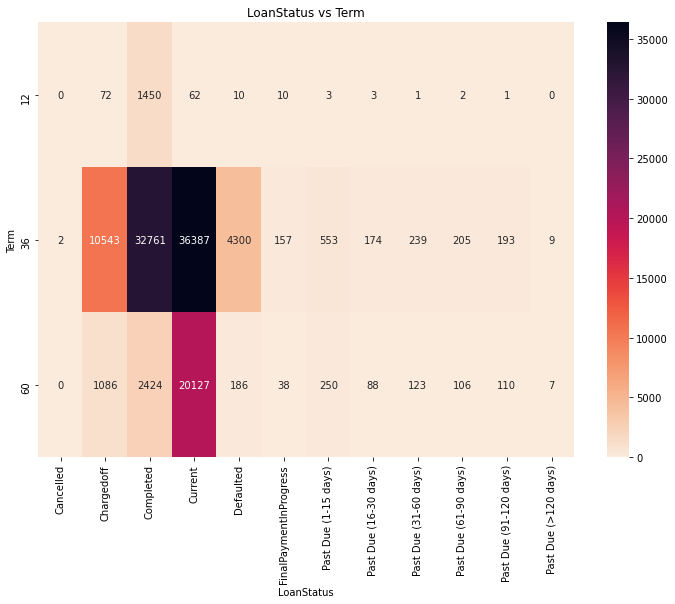

In [49]:
# plot using heatmap to determine  the relationship between  LoanStatus and  Term  according to ListingCategory
cat_counts = df.groupby(['Term', 'LoanStatus']).count()['ListingCategory']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'ListingCategory': 'count'}) 
cat_counts = cat_counts.pivot(index = 'Term', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [12, 8])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('LoanStatus vs Term');

>> according the the heat map that 36387 of borrowers who took the loan with  length of the loan expressed in 36  months are still paying the loan . and 32761 of borrwers who took the loan with  length of the loan expressed in 36  months are completed  the loan

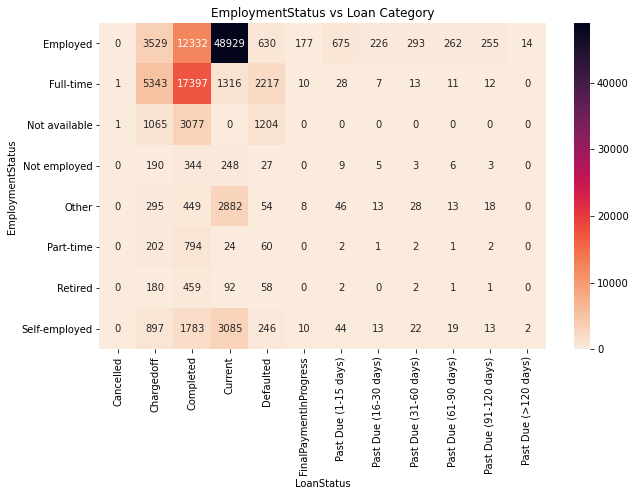

In [50]:
## plot using heatmap to determine  the relationship between  LoanStatus and  EmploymentStatus according to IncomeRange
cat_counts = df.groupby(['EmploymentStatus', 'LoanStatus']).count()['IncomeRange']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'IncomeRange': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [10, 6])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('EmploymentStatus vs Loan Category');

> according to the previous plot there are a positive relationship between LoanStatus and  EmploymentStatus ,12332 of borrowers who are employed have copmpleted the loan and 48929 have still paying the loan

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is noticed that EmploymentStatus and StatedMonthlyIncome affect both of the main features (BorrowerAPR )

 > People who are not employed receive  high interest rate compared to the employed
>The higher the income,the lower the interest rate !
> there are a positive relationship between LoanStatus and  EmploymentStatus

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> that mostly Cosmetic Procedure are given higer interest rates, and the personal loan are given the lower interest rates

In [51]:
#Create lists for numeric and categorical variables
numeric_vars =[ 'BorrowerAPR','StatedMonthlyIncome','BorrowerRate' ,'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'ListingCategory', 'EmploymentStatus', 'IncomeRange','IncomeVerifiable ','Term']

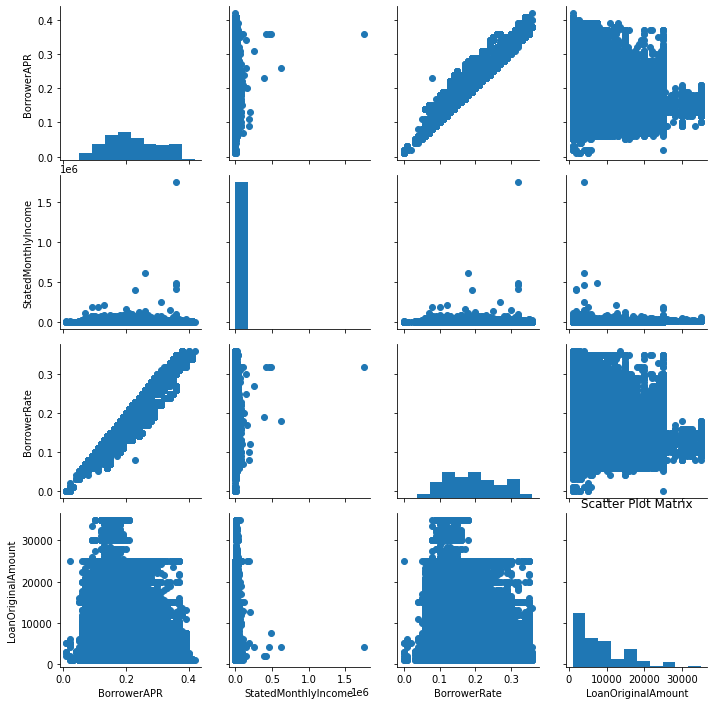

In [52]:
# Building a grid of scatter plots
g = sb.PairGrid(data = df, vars = numeric_vars)
g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins = 10)
plt.title('Scatter Plot Matrix');

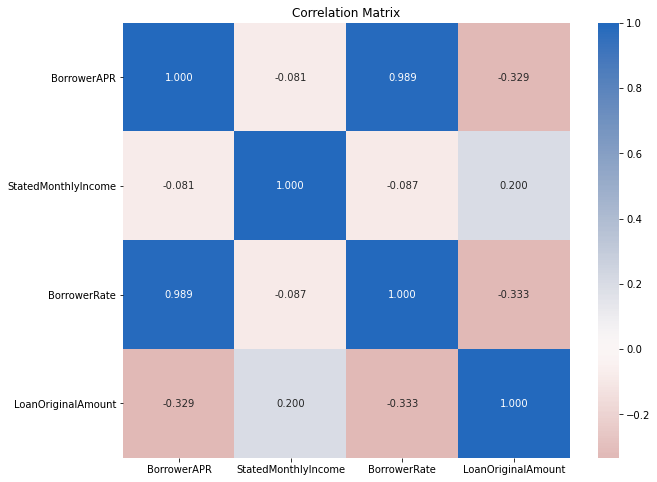

In [53]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [10, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

> Based on the correlation matrix and the scatter plots above, there are some relations of interest:
>1-LoanOriginalAmount and BorrowerRate: negative relationship, also makes sense, the bigger the loan the lower  the BorrowerRate
> 2-LoanOriginalAmount and BorrowerAPR: negative relationship, also makes sense, the bigger the loan the lower  the BorrowerAPR
>3- StatedMonthlyIncome  and LoanOriginalAmount:  week positive relationship, the higher  mothly income  the higher  loan amoant 


## Multivariate Exploration


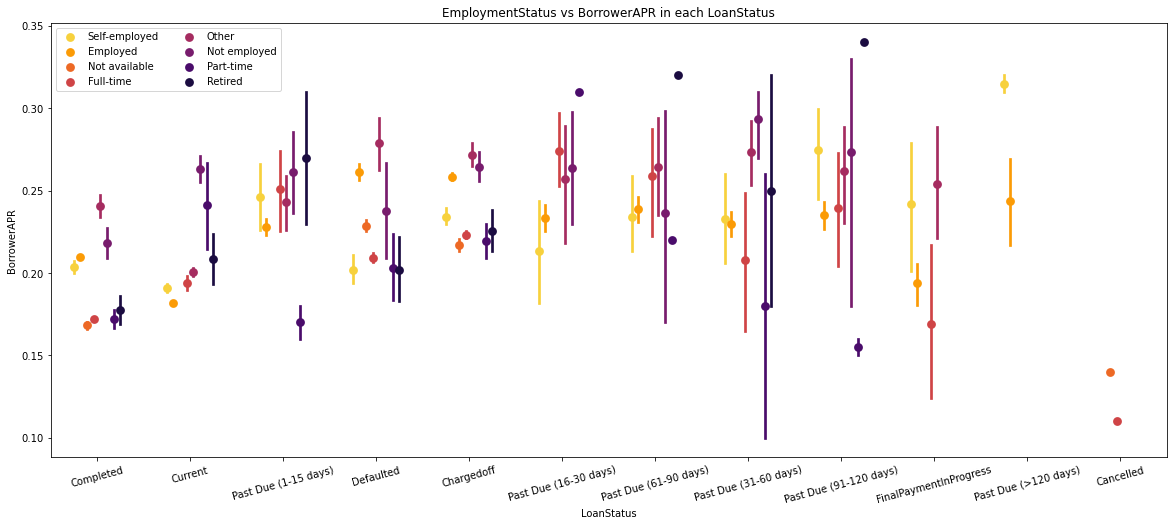

In [54]:
#plot the relationship between LoanStatus ,BorrowerAPR and EmploymentStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

>>Past Due loans generally have higher interest rates in all employment statuses , there was no relationship between LoanStatus and employment statuses

<Figure size 1800x792 with 0 Axes>

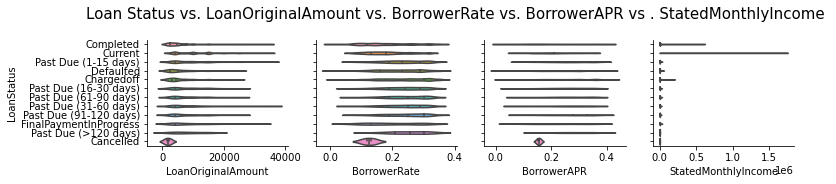

In [55]:
#plot the relationship between LoanStatus ,LoanOriginalAmount, BorrowerRate,BorrowerAPR and StatedMonthlyIncome
plt.figure(figsize = [25, 11])
g = sb.PairGrid(data = df, x_vars = ['LoanOriginalAmount', 'BorrowerRate','BorrowerAPR','StatedMonthlyIncome'],
                y_vars = ['LoanStatus'])
g.map(sb.violinplot, inner = 'quartile')
g.fig.subplots_adjust(top=0.80)
g.fig.suptitle("Loan Status vs. LoanOriginalAmount vs. BorrowerRate vs. BorrowerAPR vs . StatedMonthlyIncome ", fontsize=15);

>>Based on the  plot  as was showed previously the negative relationship between LoanStauts ,  LoanOriginalAmont And BorrowerRate and no relationship between Borrwer APR  and StatedMonthlyIncome 

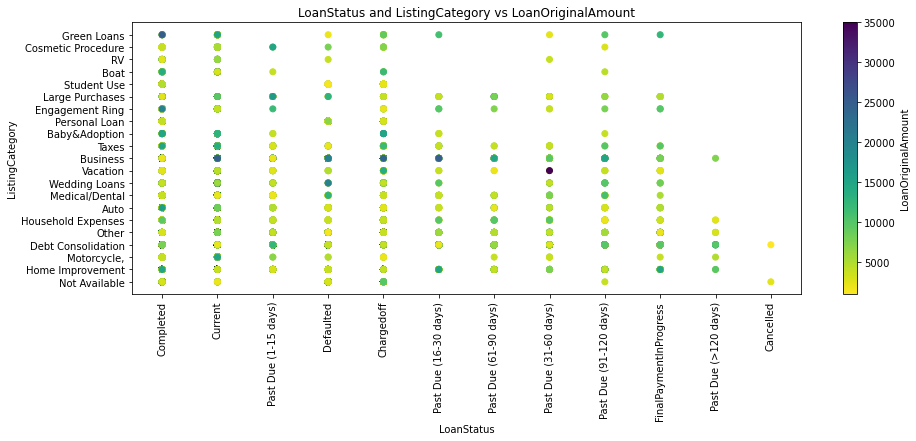

In [56]:
#plot the relationship between LoanStatus ,ListingCategory and LoanOriginalAmount
plt.figure(figsize = [15, 5])
plt.scatter(data=df,x='LoanStatus',y = 'ListingCategory',c='LoanOriginalAmount',cmap = 'viridis_r')
plt.colorbar(label = 'LoanOriginalAmount');
plt.xlabel('LoanStatus')
plt.ylabel('ListingCategory')
plt.title('LoanStatus and ListingCategory vs LoanOriginalAmount');
plt.xticks(rotation = 90);

>>It is noticed as was showed previously the negative relationship between LoanStatus  and ListingCategory , in addition to this, the chart shows most of the loans  are taken by people is about (<= 5000) amounts

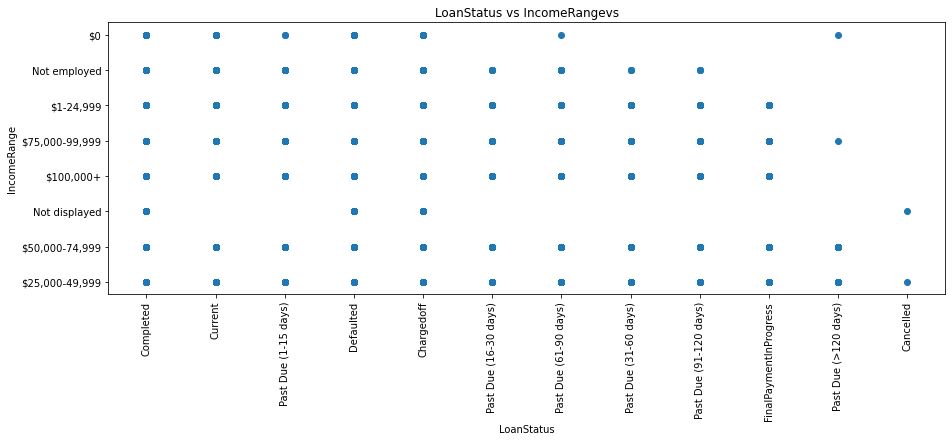

In [57]:
#plot the relationship between LoanStatus ,ListingCategory and LoanOriginalAmount
plt.figure(figsize = [15, 5])
plt.scatter(data=df,x='LoanStatus',y = 'IncomeRange',cmap = 'viridis_r')
plt.xlabel('LoanStatus')
plt.ylabel('IncomeRange')
plt.title('LoanStatus vs IncomeRangevs');
plt.xticks(rotation = 90);

>> bassed on the previous plot the LoanStatus have no relationship with IncomeRange

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>>> Relation between LoanStauts and Numeric _variable 
  -there are  negative relationship between LoanStauts ,  LoanOriginalAmont  BorrowerRate and BorrowerAPR
  -no relationship between LoanStatus  and StatedMonthlyIncome
  
>>>Relation between LoanStauts and Categorical _variable 
  -there are a positive relationship between LoanStatus and IncomeVerifiable
  -there are no relationship between loanStauts and ListingCategory ,EmploymentStatus,IncomeRange and term

### Were there any interesting or surprising interactions between features?

> It was me that there are no relationship between loanStauts ListingCategory and EmploymentStatus